# LTSM (Long Short-Term Memory)
LSTM adalah modifikasi dari RNN yang didesain untuk mengatasi masalah hilangnya informasi jangka panjang. LSTM menggunakan struktur sel memori yang terdiri dari tiga gerbang (input, forget, dan output gate) serta sel memori sendiri, yang memungkinkannya untuk mengontrol aliran informasi dalam jaringan. Dengan gerbang ini, LSTM dapat mengingat informasi jangka panjang dan memutuskan kapan untuk melupakan atau menggunakan informasi tertentu.

## Import Library

In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from tabulate import tabulate
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras

## Import Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Jakarta 2015 - 2022.csv to Jakarta 2015 - 2022.csv


In [ ]:
data_lstm = pd.read_csv('Jakarta 2015 - 2022.csv')
data_lstm.head()

,datetime,total_visitor,total_accomodation
0,1/1/2014,193017,16332
1,2/1/2014,185851,17101
2,3/1/2014,204004,17438
3,4/1/2014,186373,17943
4,5/1/2014,190716,18123


In [ ]:
data_asli = data_lstm.copy()

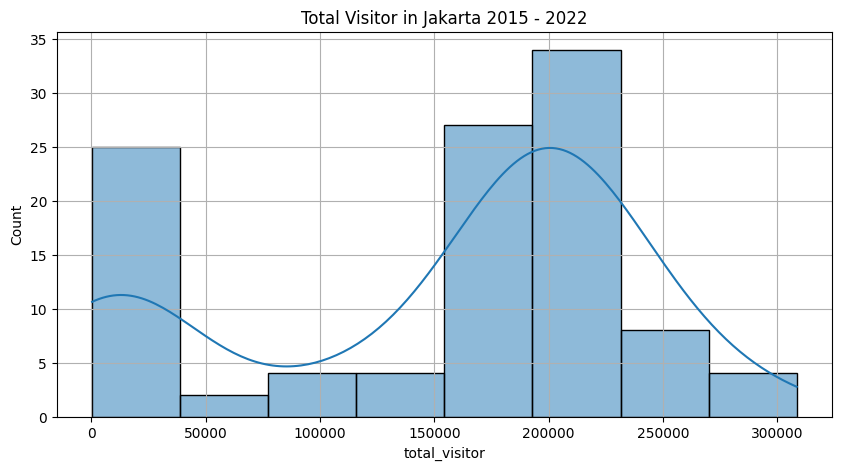

In [ ]:
# plot to see the total visitor varience
plt.figure(figsize=(10, 5))
sns.histplot(data_lstm['total_visitor'], kde=True)
plt.title("Total Visitor in Jakarta 2015 - 2022")
plt.grid()
plt.show()

## Data Preparation

In [ ]:
# set data index as datetime column
train_datetime = pd.to_datetime(data_lstm.datetime)
data_lstm = data_lstm.set_index('datetime')
data_lstm.head()

,total_visitor,total_accomodation
datetime,,
1/1/2014,193017,16332
2/1/2014,185851,17101
3/1/2014,204004,17438
4/1/2014,186373,17943
5/1/2014,190716,18123


In [ ]:
input_col = list(data_lstm)[0:2]
print(input_col)

['total_visitor', 'total_accomodation']


In [ ]:
data_for_training = data_lstm[input_col].astype(float)

In [ ]:
scaler = MinMaxScaler()
scaler = scaler.fit(data_for_training)
scaled_data_train = scaler.transform(data_for_training)

## Scenario 1

80% Train - 20% Test

In [ ]:
# Define sequence length and features
sequence_length = 12  # Karena data terdiri dari data perbulan dalam satu tahun

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data_train) - sequence_length):
    seq = scaled_data_train[i:i+sequence_length]
    label = scaled_data_train[i+sequence_length][1]
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_x, test_x, train_y, test_y = train_test_split(sequences,labels, test_size=0.2)

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)

Train X shape: (76, 12, 2)
Train Y shape: (76,)
Test X shape: (20, 12, 2)
Test Y shape: (20,)


In [ ]:
# Create the LSTM model
model = Sequential()

# Add LSTM layers with dropout
model.add(LSTM(units=256, activation = 'tanh', input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=128, activation = 'tanh', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, activation = 'tanh', return_sequences=False))

# Add a dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 12, 256)           265216    
                                                                 
 dropout_8 (Dropout)         (None, 12, 256)           0         
                                                                 
 lstm_13 (LSTM)              (None, 12, 128)           197120    
                                                                 
 dropout_9 (Dropout)         (None, 12, 128)           0         
                                                                 
 lstm_14 (LSTM)              (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 511809 (1.95 MB)
Trainable params: 51180

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping]
)

Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 0.3848 - val_loss: 0.0820
Epoch 2/100
1/1 [==============================] - 0s 263ms/step - loss: 0.2072 - val_loss: 0.0288
Epoch 3/100
1/1 [==============================] - 0s 257ms/step - loss: 0.0757 - val_loss: 0.0356
Epoch 4/100
1/1 [==============================] - 0s 272ms/step - loss: 0.0254 - val_loss: 0.0801
Epoch 5/100
1/1 [==============================] - 0s 276ms/step - loss: 0.0721 - val_loss: 0.0404
Epoch 6/100
1/1 [==============================] - 0s 174ms/step - loss: 0.0393 - val_loss: 0.0045
Epoch 7/100
1/1 [==============================] - 0s 160ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 8/100
1/1 [==============================] - 0s 151ms/step - loss: 0.0061 - val_loss: 0.0168
Epoch 9/100
1/1 [==============================] - 0s 165ms/step - loss: 0.0242 - val_loss: 0.0252
Epoch 10/100
1/1 [==============================] - 0s 161ms/step - loss: 0.0350 - val_loss: 0.0232
Epoch 11/100

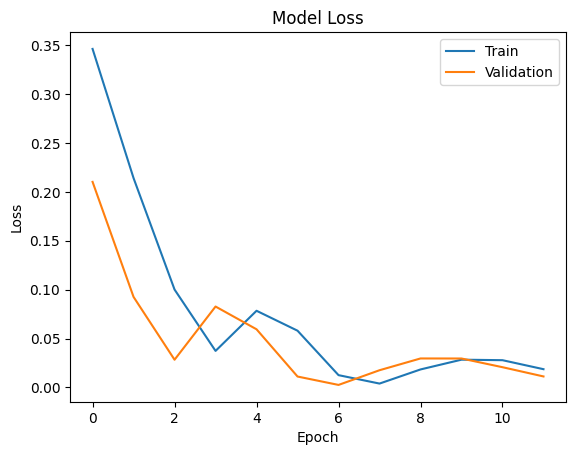

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Predict for 12 month afterwards
n_past = 1
n_month_for_prediction = 12
predict_period_month = pd.date_range(list(train_datetime)[-n_past], periods=n_month_for_prediction, freq='M').tolist()
print(predict_period_month)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
# Print the error metrics
predictions = model.predict(train_x[-n_month_for_prediction:])
mse = mean_squared_error(train_y[-n_month_for_prediction:], predictions)
rmse = np.sqrt(mse)
r2 = r2_score(train_y[-n_month_for_prediction:], predictions)
mae = mean_absolute_error(train_y[-n_month_for_prediction:], predictions)
mape = mean_absolute_percentage_error(train_y[-n_month_for_prediction:], predictions)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)
print("MAE:", mae)
print("MAPE:", mape)

1/1 [==============================] - 0s 36ms/step
MSE: 0.0023969200228121735
RMSE: 0.048958349878362666
R2: 0.9425303804744821
MAE: 0.041324686426531636
MAPE: 0.14901592117812126


In [ ]:
prediction_copies = np.repeat(predictions, data_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

<ipython-input-122-a335aede7b56>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['datetime'] = pd.to_datetime(original['datetime'])


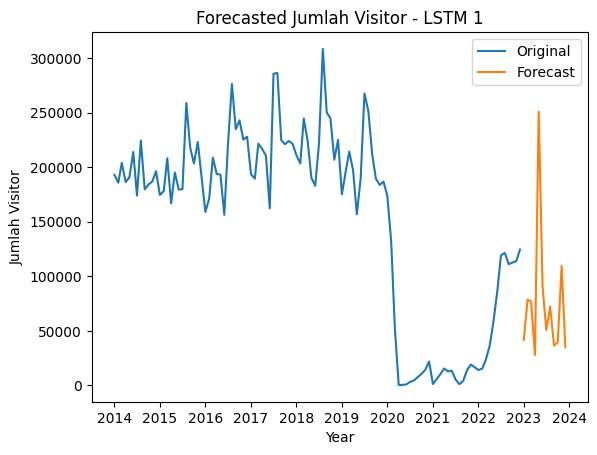

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │      41786.8 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │      78676.9 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │      76714.1 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │      27854.5 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │     250845   │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │      90521   │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │      50730.7 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │      72272.1 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │      36525   │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │      39503.2 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │     109458   │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

In [ ]:
forecast_dates = []

for time_i in predict_period_month:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Date': forecast_dates, 'total_visitor': y_pred_future})
df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])

# Assuming 'original' contains the original data with 'datetime' and 'total_visitor' columns
original = data_asli[['datetime', 'total_visitor']]
original['datetime'] = pd.to_datetime(original['datetime'])
original = original.loc[original['datetime'] >= '2013-01-01']

sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast, x='Date', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('Jumlah Visitor')
plt.title('Forecasted Jumlah Visitor - LSTM 1')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates_1 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates_1, y_pred_future))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table)

## Scenario 2

70% Train - 30% Test

In [ ]:
# Define sequence length and features
sequence_length = 12  # Karena data terdiri dari data perbulan dalam satu tahun

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data_train) - sequence_length):
    seq = scaled_data_train[i:i+sequence_length]
    label = scaled_data_train[i+sequence_length][1]
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_x_2, test_x_2, train_y_2, test_y_2 = train_test_split(sequences,labels, test_size=0.3)

print("Train X shape:", train_x_2.shape)
print("Train Y shape:", train_y_2.shape)
print("Test X shape:", test_x_2.shape)
print("Test Y shape:", test_y_2.shape)

Train X shape: (67, 12, 2)
Train Y shape: (67,)
Test X shape: (29, 12, 2)
Test Y shape: (29,)


In [ ]:
# Create the LSTM model
model = Sequential()

# Add GRU layers with dropout
model.add(LSTM(units=256, activation = 'tanh', input_shape=(train_x_2.shape[1], train_x_2.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=128,  activation = 'tanh', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, activation = 'tanh', return_sequences=False))

# Add a dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 12, 256)           265216    
                                                                 
 dropout_12 (Dropout)        (None, 12, 256)           0         
                                                                 
 lstm_19 (LSTM)              (None, 12, 128)           197120    
                                                                 
 dropout_13 (Dropout)        (None, 12, 128)           0         
                                                                 
 lstm_20 (LSTM)              (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 511809 (1.95 MB)
Trainable params: 51180

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_x_2, train_y_2,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping]
)

Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 0.3203 - val_loss: 0.1658
Epoch 2/100
1/1 [==============================] - 0s 252ms/step - loss: 0.1674 - val_loss: 0.0618
Epoch 3/100
1/1 [==============================] - 0s 291ms/step - loss: 0.0577 - val_loss: 0.0548
Epoch 4/100
1/1 [==============================] - 0s 317ms/step - loss: 0.0564 - val_loss: 0.0605
Epoch 5/100
1/1 [==============================] - 0s 266ms/step - loss: 0.0667 - val_loss: 0.0186
Epoch 6/100
1/1 [==============================] - 0s 298ms/step - loss: 0.0205 - val_loss: 0.0022
Epoch 7/100
1/1 [==============================] - 0s 257ms/step - loss: 0.0026 - val_loss: 0.0128
Epoch 8/100
1/1 [==============================] - 0s 268ms/step - loss: 0.0140 - val_loss: 0.0241
Epoch 9/100
1/1 [==============================] - 0s 230ms/step - loss: 0.0251 - val_loss: 0.0244
Epoch 10/100
1/1 [==============================] - 0s 290ms/step - loss: 0.0257 - val_loss: 0.0166
Epoch 11/100

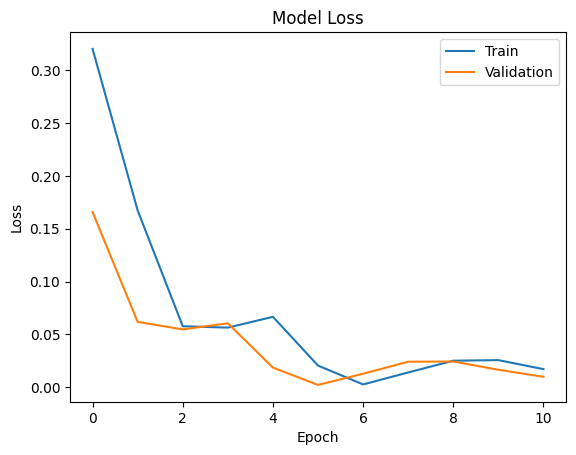

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Predict for 12 month afterwards
n_past = 1
n_month_for_prediction = 12
predict_period_month = pd.date_range(list(train_datetime)[-n_past], periods=n_month_for_prediction, freq='M').tolist()
print(predict_period_month)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
# Print the error metrics
predictions = model.predict(train_x_2[-n_month_for_prediction:])
mse2 = mean_squared_error(train_y_2[-n_month_for_prediction:], predictions)
rmse2 = np.sqrt(mse)
r2_2 = r2_score(train_y_2[-n_month_for_prediction:], predictions)
mae2 = mean_absolute_error(train_y_2[-n_month_for_prediction:], predictions)
mape2 = mean_absolute_percentage_error(train_y_2[-n_month_for_prediction:], predictions)

print("MSE:", mse2)
print("RMSE:", rmse2)
print("R2:", r2_2)
print("MAE:", mae2)
print("MAPE:", mape2)

1/1 [==============================] - 0s 33ms/step
MSE: 0.0020759804649392284
RMSE: 0.04556292862557485
R2: 0.9718546016246993
MAE: 0.03977102360428694
MAPE: 0.15066959675585878


In [ ]:
prediction_copies = np.repeat(predictions, data_for_training.shape[1], axis=-1)
y_pred_future2 = scaler.inverse_transform(prediction_copies)[:,0]

<ipython-input-93-6f37e7aef7f4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original2['datetime'] = pd.to_datetime(original2['datetime'])


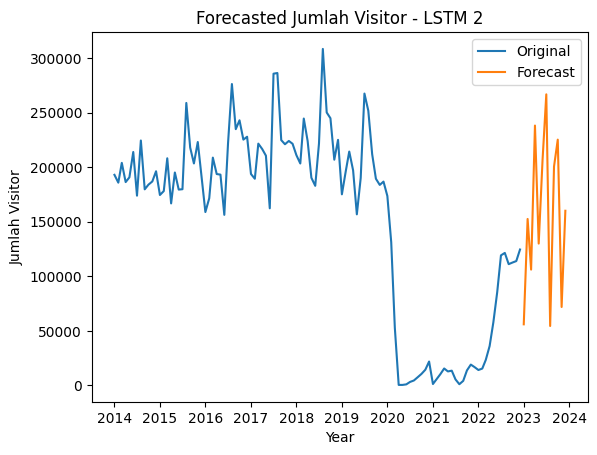

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │      55973.5 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │     152566   │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │     106140   │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │     238186   │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │     130004   │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │     206842   │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │     266800   │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │      54435.9 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │     200650   │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │     225277   │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │      71863.8 │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

In [ ]:
forecast_dates2 = []

for time_i in predict_period_month:
    forecast_dates2.append(time_i.date())

df_forecast2 = pd.DataFrame({'Date': forecast_dates2, 'total_visitor': y_pred_future2})
df_forecast2['Date'] = pd.to_datetime(df_forecast2['Date'])

# Assuming 'original' contains the original data with 'datetime' and 'total_visitor' columns
original2 = data_asli[['datetime', 'total_visitor']]
original2['datetime'] = pd.to_datetime(original2['datetime'])
original2 = original2.loc[original2['datetime'] >= '2013-01-01']

sns.lineplot(data=original2, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast2, x='Date', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('Jumlah Visitor')
plt.title('Forecasted Jumlah Visitor - LSTM 2')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data2 = list(zip(forecast_dates, y_pred_future2))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data2, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table)

## Scenario 3

60% Train - 40% Test

In [ ]:
# Define sequence length and features
sequence_length = 12  # Karena data terdiri dari data perbulan dalam satu tahun

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data_train) - sequence_length):
    seq = scaled_data_train[i:i+sequence_length]
    label = scaled_data_train[i+sequence_length][1]
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_x_3, test_x_3, train_y_3, test_y_3 = train_test_split(sequences,labels, test_size=0.4)

print("Train X shape:", train_x_3.shape)
print("Train Y shape:", train_y_3.shape)
print("Test X shape:", test_x_3.shape)
print("Test Y shape:", test_y_3.shape)

Train X shape: (57, 12, 2)
Train Y shape: (57,)
Test X shape: (39, 12, 2)
Test Y shape: (39,)


In [ ]:
# Create the LSTM model
model = Sequential()

# Add LSTM layers with dropout
model.add(LSTM(units=256, activation = 'tanh', input_shape=(train_x_3.shape[1], train_x_3.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=128, activation = 'tanh', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, activation = 'tanh', return_sequences=False))

# Add a dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 12, 256)           265216    
                                                                 
 dropout_14 (Dropout)        (None, 12, 256)           0         
                                                                 
 lstm_22 (LSTM)              (None, 12, 128)           197120    
                                                                 
 dropout_15 (Dropout)        (None, 12, 128)           0         
                                                                 
 lstm_23 (LSTM)              (None, 64)                49408     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 511809 (1.95 MB)
Trainable params: 51180

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_x_3, train_y_3,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping]
)

Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 0.3717 - val_loss: 0.2369
Epoch 2/100
1/1 [==============================] - 0s 151ms/step - loss: 0.2066 - val_loss: 0.1017
Epoch 3/100
1/1 [==============================] - 0s 146ms/step - loss: 0.0818 - val_loss: 0.0300
Epoch 4/100
1/1 [==============================] - 0s 154ms/step - loss: 0.0241 - val_loss: 0.0617
Epoch 5/100
1/1 [==============================] - 0s 149ms/step - loss: 0.0687 - val_loss: 0.0389
Epoch 6/100
1/1 [==============================] - 0s 155ms/step - loss: 0.0408 - val_loss: 0.0043
Epoch 7/100
1/1 [==============================] - 0s 143ms/step - loss: 0.0038 - val_loss: 0.0046
Epoch 8/100
1/1 [==============================] - 0s 154ms/step - loss: 0.0064 - val_loss: 0.0208
Epoch 9/100
1/1 [==============================] - 0s 145ms/step - loss: 0.0254 - val_loss: 0.0292
Epoch 10/100
1/1 [==============================] - 0s 145ms/step - loss: 0.0331 - val_loss: 0.0251
Epoch 11/100

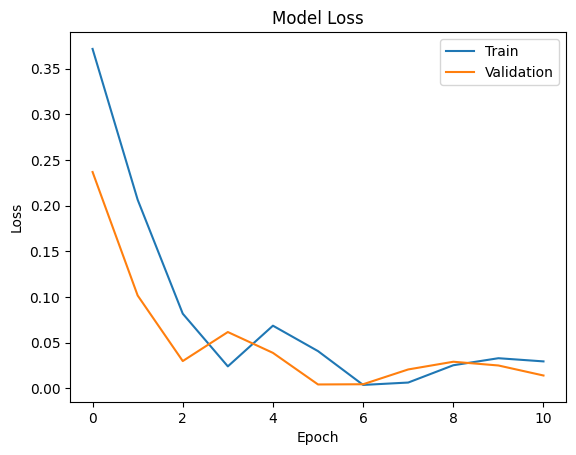

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Predict for 12 month afterwards
n_past = 1
n_month_for_prediction = 12
predict_period_month = pd.date_range(list(train_datetime)[-n_past], periods=n_month_for_prediction, freq='M').tolist()
print(predict_period_month)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
# Print the error metrics
predictions = model.predict(train_x_3[-n_month_for_prediction:])
mse3 = mean_squared_error(train_y_3[-n_month_for_prediction:], predictions)
rmse3 = np.sqrt(mse)
r2_3 = r2_score(train_y_3[-n_month_for_prediction:], predictions)
mae3 = mean_absolute_error(train_y_3[-n_month_for_prediction:], predictions)
mape3 = mean_absolute_percentage_error(train_y_3[-n_month_for_prediction:], predictions)

print("MSE:", mse3)
print("RMSE:", rmse3)
print("R2:", r2_3)
print("MAE:", mae3)
print("MAPE:", mape3)

1/1 [==============================] - 2s 2s/step
MSE: 0.004323810519439368
RMSE: 0.04556292862557485
R2: 0.9606431142927182
MAE: 0.06405992171230682
MAPE: 0.22678623131845418


In [ ]:
prediction_copies3 = np.repeat(predictions, data_for_training.shape[1], axis=-1)
y_pred_future3 = scaler.inverse_transform(prediction_copies3)[:,0]

<ipython-input-106-e7f9aaa29661>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original3['datetime'] = pd.to_datetime(original3['datetime'])


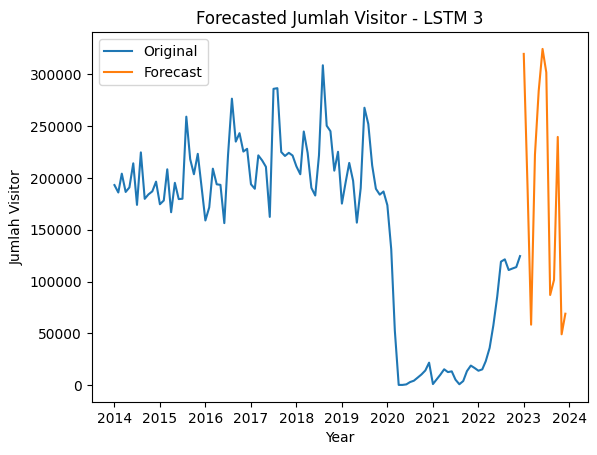

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │     319406   │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │     188444   │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │      58477.6 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │     222449   │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │     283808   │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │     324199   │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │     301539   │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │      87092.7 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │     101606   │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │     239389   │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │      49207.3 │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

In [ ]:
forecast_dates3 = []

for time_i in predict_period_month:
    forecast_dates3.append(time_i.date())

df_forecast3 = pd.DataFrame({'Date': forecast_dates3, 'total_visitor': y_pred_future3})
df_forecast3['Date'] = pd.to_datetime(df_forecast3['Date'])

# Assuming 'original' contains the original data with 'datetime' and 'total_visitor' columns
original3 = data_asli[['datetime', 'total_visitor']]
original3['datetime'] = pd.to_datetime(original3['datetime'])
original3 = original3.loc[original3['datetime'] >= '2013-01-01']

sns.lineplot(data=original3, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast3, x='Date', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('Jumlah Visitor')
plt.title('Forecasted Jumlah Visitor - LSTM 3')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data3 = list(zip(forecast_dates, y_pred_future3))

# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data3, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table)

#Conclusion

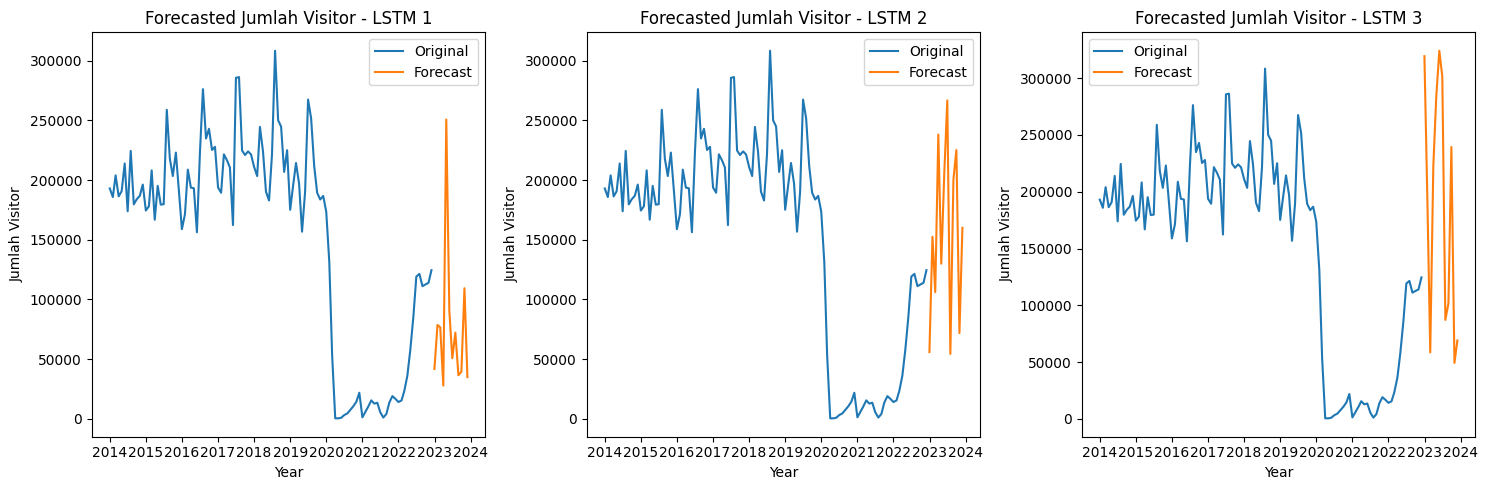

╒════════════╤═════════╤═══════════╤════════════╤══════════╤═══════════╤══════════╕
│ Scenario   │ Model   │      RMSE │        MSE │     MAPE │       MAE │       R2 │
╞════════════╪═════════╪═══════════╪════════════╪══════════╪═══════════╪══════════╡
│ Scenario 1 │ LSTM    │ 0.0489583 │ 0.00239692 │ 0.149016 │ 0.0413247 │ 0.94253  │
├────────────┼─────────┼───────────┼────────────┼──────────┼───────────┼──────────┤
│ Scenario 2 │ LSTM    │ 0.0455629 │ 0.00207598 │ 0.15067  │ 0.039771  │ 0.971855 │
├────────────┼─────────┼───────────┼────────────┼──────────┼───────────┼──────────┤
│ Scenario 3 │ LSTM    │ 0.0455629 │ 0.00432381 │ 0.226786 │ 0.0640599 │ 0.960643 │
╘════════════╧═════════╧═══════════╧════════════╧══════════╧═══════════╧══════════╛


In [ ]:
plt.figure(figsize=(15, 5))

# Scenario 1
plt.subplot(1, 3, 1)
sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast, x='Date', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('Jumlah Visitor')
plt.title('Forecasted Jumlah Visitor - LSTM 1')
plt.legend()

# Scenario 2
plt.subplot(1, 3, 2)
sns.lineplot(data=original2, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast2, x='Date', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('Jumlah Visitor')
plt.title('Forecasted Jumlah Visitor - LSTM 2')
plt.legend()

# Scenario 3
plt.subplot(1, 3, 3)
sns.lineplot(data=original3, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast3, x='Date', y='total_visitor', label='Forecast')

plt.xlabel('Year')
plt.ylabel('Jumlah Visitor')
plt.title('Forecasted Jumlah Visitor - LSTM 3')
plt.legend()

plt.tight_layout()
plt.show()


# Define the data for each scenario
scenario_data = [
    {
        'Scenario': 'Scenario 1',
        'Model': 'LSTM',
        'RMSE': rmse,
        'MSE': mse,
        'MAPE': mape,
        'MAE': mae,
        'R2': r2
    },
    {
        'Scenario': 'Scenario 2',
        'Model': 'LSTM',
        'RMSE': rmse2,
        'MSE': mse2,
        'MAPE': mape2,
        'MAE': mae2,
        'R2': r2_2
    },
    {
        'Scenario': 'Scenario 3',
        'Model': 'LSTM',
        'RMSE': rmse3,
        'MSE': mse3,
        'MAPE': mape3,
        'MAE': mae3,
        'R2': r2_3
    }
]

# Create a DataFrame from the scenario data
df = pd.DataFrame(scenario_data)

# Convert DataFrame to a list of rows
rows = df.values.tolist()

# Create a list of headers
headers = df.columns.tolist()

# Generate the table
table = tabulate(rows, headers=headers, tablefmt='fancy_grid')

# Print the table
print(table)